## Solis Projectum => Data Analysis

In [2]:
from scipy import stats
from scipy.stats import linregress
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import solis

In [3]:
# Data file locations
clean_dir = "data/clean"
plots_file_name = "plots/Solis-Projectum."

In [4]:
solar_maximum_years = [1894, 1906, 1917, 1928, 1937, 1947, 1958, 1968, 1979, 1989, 2001, 2014]
solar_minimum_years = [1890, 1902, 1913, 1923, 1934, 1944, 1954, 1964, 1976, 1987, 1996, 2008]

### Load the Clean data
***

In [5]:
#### Sunspots
csv_file_sunspots = {"monthly":"sunspot_monthly.csv","yearly":"sunspot_yearly.csv"}

sunspot_monthly = solis.load_csv(csv_file_sunspots["monthly"])
sunspot_monthly = sunspot_monthly.set_index("Year")

sunspot_yearly = solis.load_csv(csv_file_sunspots["yearly"])
sunspot_yearly = sunspot_yearly.set_index("Year")

In [6]:
#### Temperature
csv_file_temp = {"avg":"temp_average.csv","max":"temp_maximum.csv","min":"temp_minimum.csv"}

temp_average = solis.load_csv(csv_file_temp["avg"])
temp_average = temp_average.set_index("Year")

temp_maximum = solis.load_csv(csv_file_temp["max"])
temp_maximum = temp_maximum.set_index("Year")

temp_minimum = solis.load_csv(csv_file_temp["min"])
temp_minimum = temp_minimum.set_index("Year")

In [7]:
#### Cooling & Heating Days
csv_file_heatcool = {"summer":"summer_cooling_days.csv","winter":"winter_heating_days.csv"}

summer_cooling_days = solis.load_csv(csv_file_heatcool["summer"])
winter_heating_days = solis.load_csv(csv_file_heatcool["winter"])

### Plots
***

# Space Weather

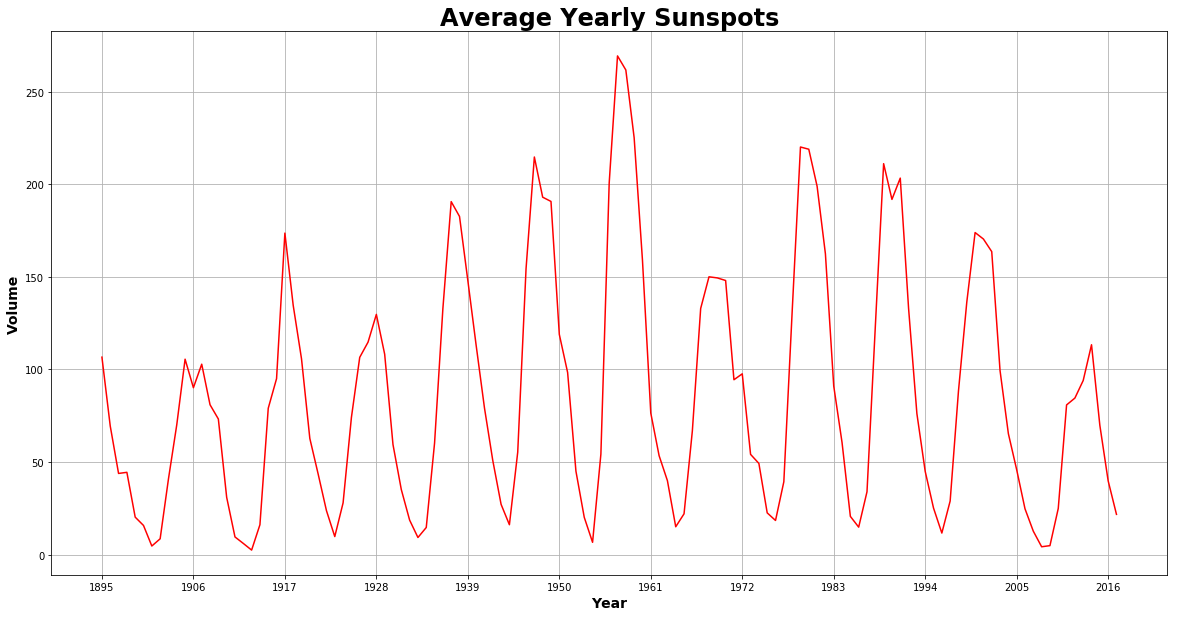

In [7]:
# Generate the Plot
plt.figure(figsize = (20,10))
plt.title("Average Yearly Sunspots",fontdict = {'fontsize': 24, 'fontweight': 'bold'})
plt.ylabel("Volume", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Year", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xticks(np.arange(1895,2020,step=11))
plt.grid(True)

x_axis = sunspot_yearly.index
sunspot_yearly_mean_total = sunspot_yearly["Yearly Mean Total Sunspots"]

plt.plot(x_axis, sunspot_yearly_mean_total, color='red')
plt.savefig(plots_file_name+"Average.Yearly.Sunspots.png")
plt.show()

# Terra Firma Weather

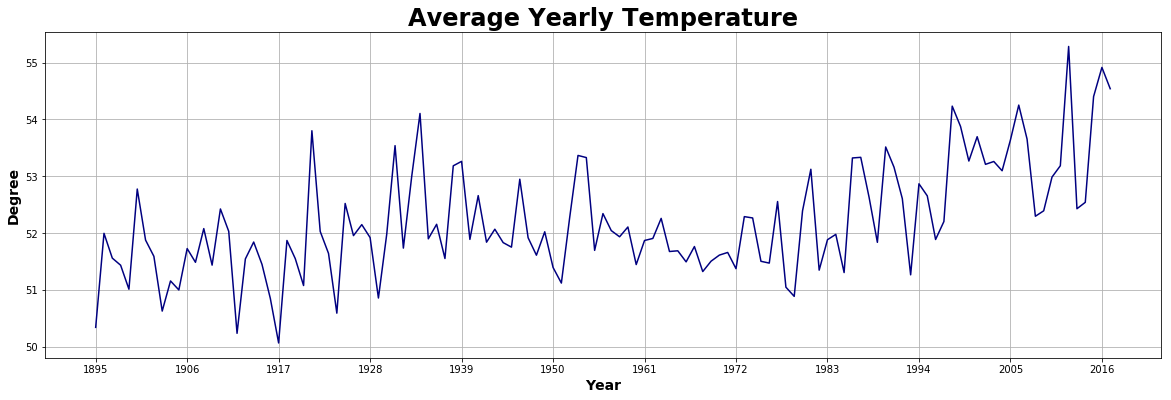

In [8]:
# Generate the Plot
plt.figure(figsize = (20,6))
plt.title("Average Yearly Temperature",fontdict = {'fontsize': 24, 'fontweight': 'bold'})
plt.ylabel("Degree", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Year", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xticks(np.arange(1895,2020,step=11))
plt.grid(True)

x_axis = temp_average.index

plt.plot(x_axis, temp_average.mean(axis=1), color='navy')
plt.savefig(plots_file_name+"Average.Yearly.Temperature.png")
plt.show()

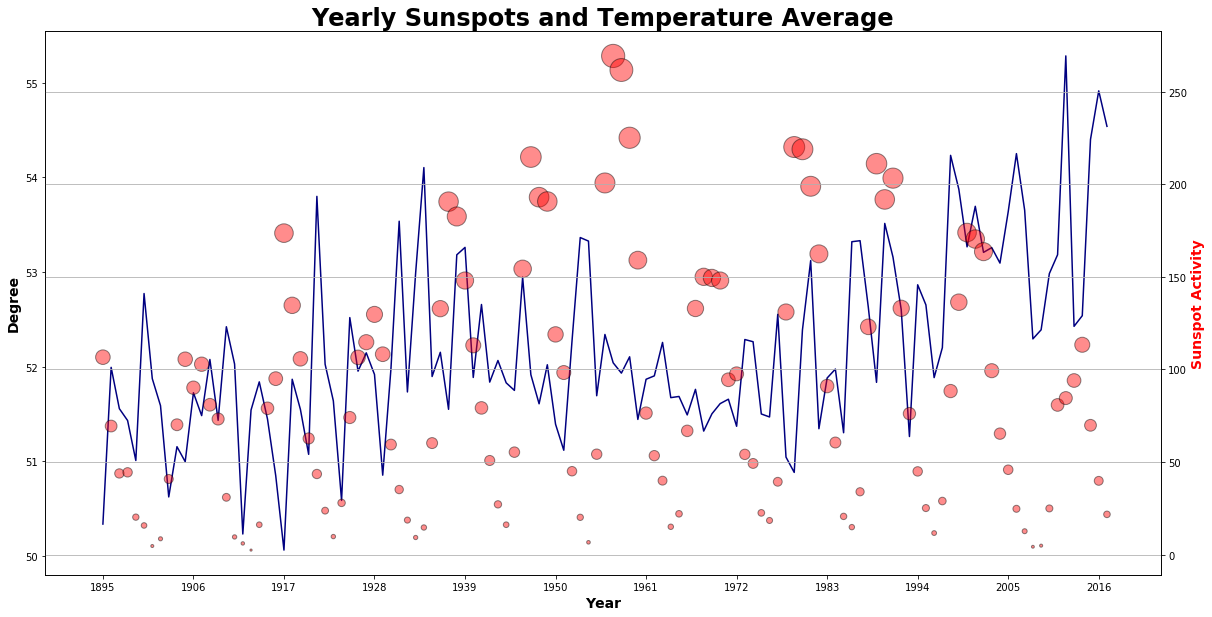

In [9]:
# Generate the Plot
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

ax1.set_title("Yearly Sunspots and Temperature Average",fontdict = {'fontsize': 24, 'fontweight': 'bold'})
ax1.set_xlabel("Year", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
ax1.set_ylabel("Degree", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
ax2.set_ylabel("Sunspot Activity", fontdict = {'fontsize': 14, 'fontweight': 'bold'}, color = "red")

x_axis = temp_average.index

ax1.set_xticks(np.arange(1895,2020,step=11))
ax1.plot(x_axis, temp_average.mean(axis=1), color='navy')
ax2.scatter(x_axis, sunspot_yearly_mean_total, color='red', edgecolors='black', s=(sunspot_yearly_mean_total*2), alpha=.45)

plt.grid(True)
plt.savefig(plots_file_name+"Yearly.Sunspots_Temperature.Average.png")
plt.show()

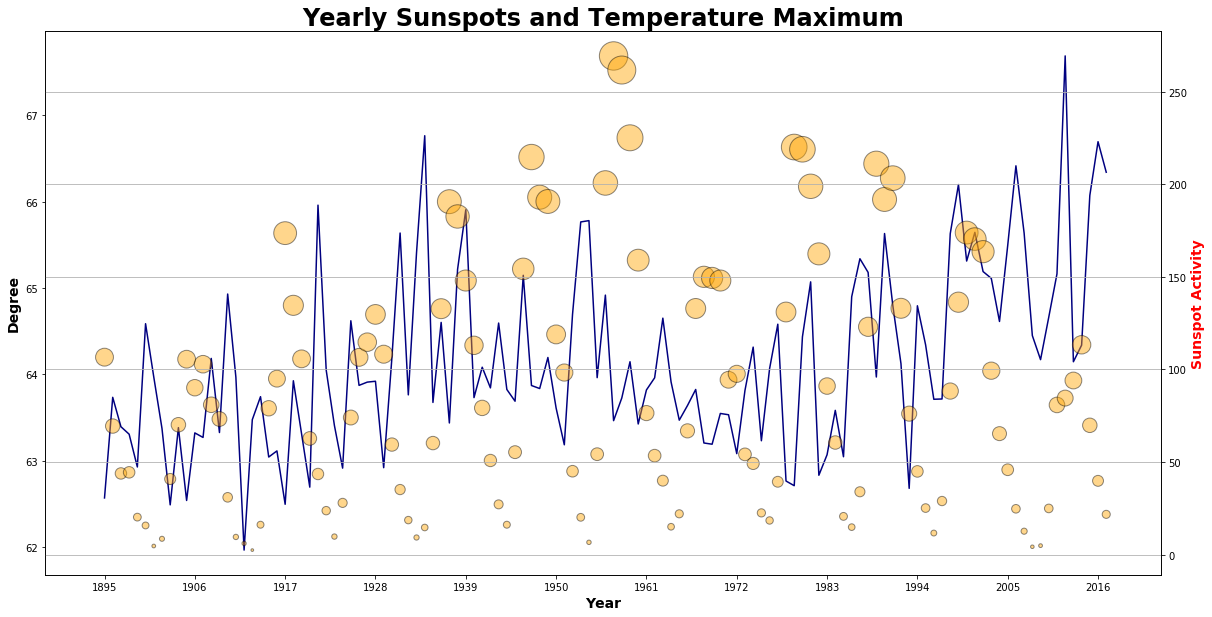

In [10]:
# Generate the Plot
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()

ax1.set_title("Yearly Sunspots and Temperature Maximum",fontdict = {'fontsize': 24, 'fontweight': 'bold'})
ax1.set_xlabel("Year", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
ax1.set_ylabel("Degree", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
ax2.set_ylabel("Sunspot Activity", fontdict = {'fontsize': 14, 'fontweight': 'bold'}, color = "red")

x_axis = temp_maximum.index

ax1.set_xticks(np.arange(1895,2020,step=11))
ax1.plot(x_axis, temp_maximum.mean(axis=1), color='navy')
ax2.scatter(x_axis, sunspot_yearly_mean_total, color='orange', edgecolors='black', s=(sunspot_yearly_mean_total*3), alpha=.45)

plt.grid(True)
plt.savefig(plots_file_name+"Yearly.Sunspots_Temperature.Maximum.png")
plt.show()

### Summer and Winter

In [96]:
temp_maximum = temp_maximum.reset_index()
temp_maximum_summer = temp_maximum[["Year", "June", "July", "Aug"]]
temp_maximum_summer = temp_maximum_summer.set_index("Year")

In [97]:
temp_max_summer_mean = pd.DataFrame(temp_maximum_summer.mean(axis=1))
temp_max_summer_mean.rename(index=str, columns={0:'Temp'}, inplace=True)

In [98]:
temp_minimum = temp_maximum.reset_index()
temp_minimum_winter = temp_minimum[["Year", "Jan", "Feb", "Dec"]]
temp_minimum_winter = temp_minimum_winter.set_index("Year")

In [99]:
temp_min_winter = pd.DataFrame(temp_minimum_winter.stack(level=0))
temp_min_winter = temp_min_winter.reset_index()
temp_min_winter.rename(index=str, columns={'level_1': 'Month',0:'Temp'}, inplace=True)

In [113]:
# winter carries over into next calendar year; adjusted dataset for "Winter Year"
winter_year = []
for index, row in temp_min_winter.iterrows():
    if row["Month"] == "Dec":
        w_year = row["Year"]+1
        if w_year != 2018:
            winter_year.append(w_year)
    else:
        winter_year.append(row["Year"])

temp_min_winter["Winter Year"] = winter_year

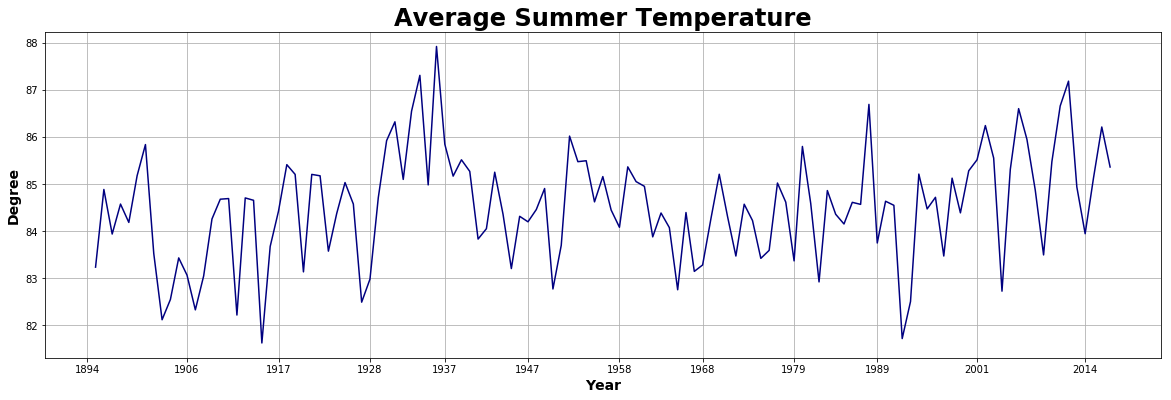

In [114]:
# Generate the Plot (summer)
plt.figure(figsize = (20,6))
plt.title("Average Summer Temperature",fontdict = {'fontsize': 24, 'fontweight': 'bold'})
plt.ylabel("Degree", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Year", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xticks(solar_maximum_years)
plt.grid(True)

x_axis = temp_maximum_summer.index
plt.plot(x_axis, temp_maximum_summer.mean(axis=1), color='navy')

plt.savefig(plots_file_name+"Average.Summer.Temperature.png")
plt.show()

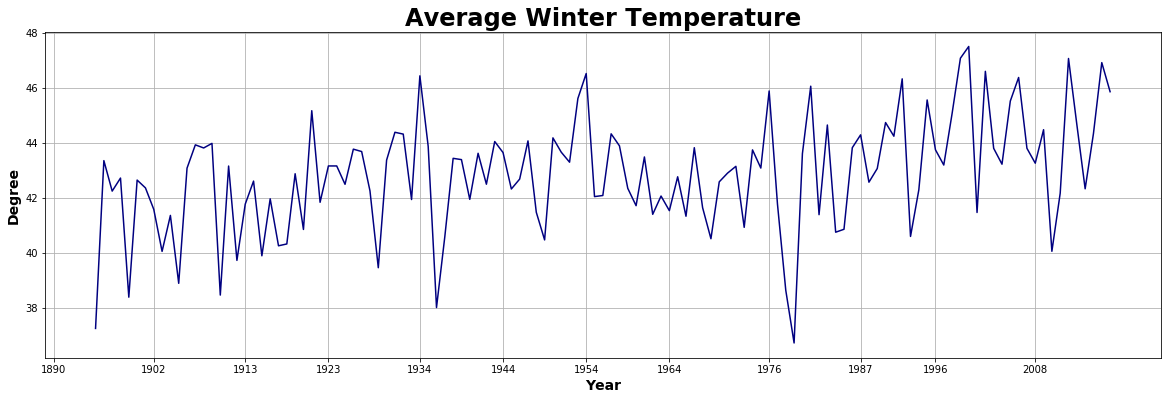

In [115]:
# Generate the Plot (winter)
plt.figure(figsize = (20,6))
plt.title("Average Winter Temperature",fontdict = {'fontsize': 24, 'fontweight': 'bold'})
plt.ylabel("Degree", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Year", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xticks(solar_minimum_years)
plt.grid(True)

temp_min_winter_mean = pd.DataFrame(temp_min_winter.groupby(["Winter Year"]).mean()["Temp"])
x_axis = temp_min_winter_mean.index

plt.plot(x_axis, temp_min_winter_mean, color='navy')

plt.savefig(plots_file_name+"Average.Winter.Temperature.png")
plt.show()

### Summer and Winter Rolling

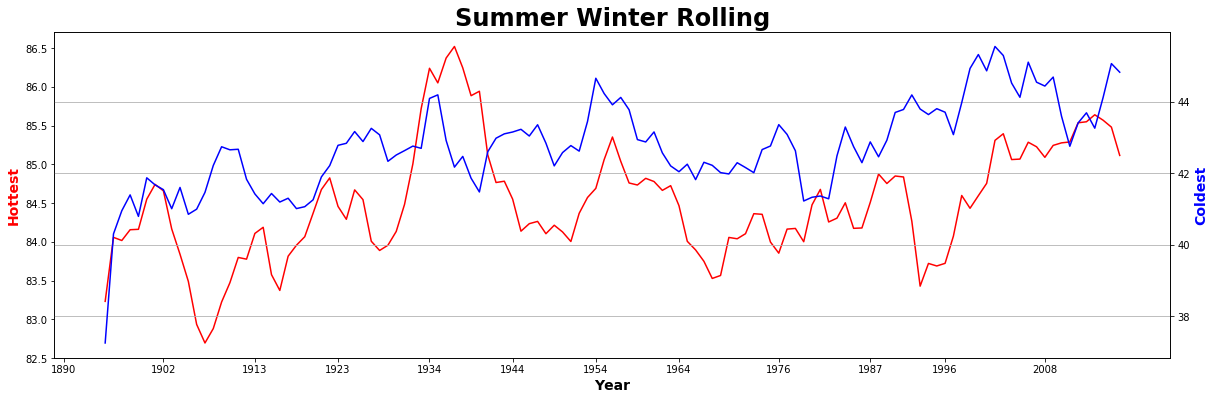

In [118]:
# Generate the Plot
fig = plt.figure(figsize = (20,6))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

ax1.set_title("Winter Summer Rolling",fontdict = {'fontsize': 24, 'fontweight': 'bold'})
ax1.set_xlabel("Year", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
ax1.set_ylabel("Hottest", fontdict = {'fontsize': 14, 'fontweight': 'bold'}, color = "red")
ax2.set_ylabel("Coldest", fontdict = {'fontsize': 14, 'fontweight': 'bold'}, color = "blue")

x_axis = temp_min_winter_mean.index
temp_min_winter_rolling_mean = temp_min_winter_mean.rolling(window=5, min_periods=1).mean()
temp_max_summer_rolling_mean = temp_max_summer_mean.rolling(window=5, min_periods=1).mean()

ax1.set_xticks(solar_minimum_years)
ax1.plot(x_axis, temp_max_summer_rolling_mean, color='red')
ax2.plot(x_axis, temp_min_winter_rolling_mean, color='blue')


plt.grid(True)
#plt.savefig(plots_file_name+"Winter.Summer_Rolling.Average.png")
plt.show()